In [1]:
import pandas as pd
import networkx as nx
import matplotlib as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [2]:
teams_df = pd.read_csv("cfb22.csv")
stats_df = teams_df[['Team','Opp Rush Yards Alloweed', 'Opp Pass Yds Allowed']]
stats_df

,Team,Opp Rush Yards Alloweed,Opp Pass Yds Allowed
0,Tennessee (SEC),1505,3764
1,Washington (Pac-12),1576,3269
2,Southern California (Pac-12),2237,3698
3,UCLA (Pac-12),1689,3549
4,Georgia (SEC),1156,3296
...,...,...,...
126,Rutgers (Big Ten),1715,2482
127,Colorado (Pac-12),2941,3176
128,Massachusetts (FBS Independent),2332,2103
129,Iowa (Big Ten),1317,2203


In [3]:
scaler = MinMaxScaler()
cols_to_normalize = [col for col in stats_df.columns if pd.api.types.is_numeric_dtype(teams_df[col])]
df_normalized = pd.DataFrame(stats_df[cols_to_normalize])
df_normalized[cols_to_normalize] = scaler.fit_transform(df_normalized[cols_to_normalize])
df_normalized = pd.concat([df_normalized, stats_df.drop(columns=cols_to_normalize)], axis=1)
df_normalized.head()

,Opp Rush Yards Alloweed,Opp Pass Yds Allowed,Team
0,0.296523,0.887324,Tennessee (SEC)
1,0.329887,0.654930,Washington (Pac-12)
2,0.640508,0.856338,Southern California (Pac-12)
3,0.382989,0.786385,UCLA (Pac-12)
4,0.132519,0.667606,Georgia (SEC)


<AxesSubplot:xlabel='Opp Rush Yards Alloweed', ylabel='Opp Pass Yds Allowed'>

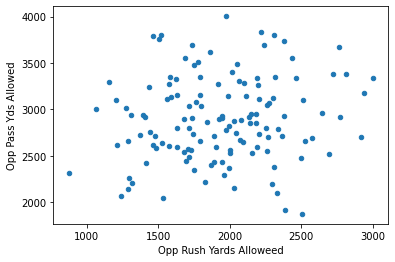

In [5]:
teams_df.plot.scatter(x='Opp Rush Yards Alloweed',y='Opp Pass Yds Allowed')

In [6]:
cosine_similarities = cosine_similarity(df_normalized[df_normalized['Team'] != 'Georgia (SEC)'][['Opp Rush Yards Alloweed', 'Opp Pass Yds Allowed']],
                                        df_normalized[df_normalized['Team'] == 'Georgia (SEC)'][['Opp Rush Yards Alloweed', 'Opp Pass Yds Allowed']])

georgia_similarities = {}
for i, Team in enumerate(df_normalized[df_normalized['Team'] != 'Georgia (SEC)']['Team']):
    georgia_similarities[Team] = cosine_similarities[i][0]

ordered_similarities = {k: v for k, v in sorted(georgia_similarities.items(), key=lambda item: item[1], reverse=True)}

print("Cosine similarity scores of every team compared to Georgia Bulldogs:")
for team, similarity_score in ordered_similarities.items():
    print(team, similarity_score)

Cosine similarity scores of every team compared to Georgia Bulldogs:
Navy (AAC) 0.9996570805134206
South Alabama (Sun Belt) 0.9975615248708346
East Carolina (AAC) 0.9948540609702112
Middle Tenn. (C-USA) 0.9920427557445146
Tennessee (SEC) 0.9920022897720412
Pittsburgh (ACC) 0.9900021660886411
NC State (ACC) 0.9817215823309027
Clemson (ACC) 0.981064541474298
James Madison (Sun Belt) 0.9808628548175803
Marshall (Sun Belt) 0.9744644164856052
Coastal Carolina (Sun Belt) 0.9699211157855625
Duke (ACC) 0.9683049888984365
UCLA (Pac-12) 0.9670902689490111
Texas St. (Sun Belt) 0.9667405288064665
Washington (Pac-12) 0.9635971221339783
Oregon St. (Pac-12) 0.9621307221718572
Oregon (Pac-12) 0.9615595649436796
Ohio (MAC) 0.9608431213981998
Wisconsin (Big Ten) 0.957285513521013
Washington St. (Pac-12) 0.9542095421652288
Utah (Pac-12) 0.9527173226573491
Wake Forest (ACC) 0.9522432920001732
Memphis (AAC) 0.9497437351511585
Houston (AAC) 0.949716086388265
Michigan (Big Ten) 0.9440377204238576
Texas (Big 